# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

^C
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

C:\Users\Harsh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [43]:
import iso3166 as iso

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [31]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [9]:
df_data.head()

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df_data.duplicated().any()

False

In [32]:
df_data = df_data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    NaN   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    NaN   
4320                           Juno I | Explorer 1  StatusRetired    NaN   
4321                       Vanguard | Vanguard TV3  StatusRetired    NaN   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 7 columns]

## Descriptive Statistics

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Mission_Status  4324 non-null   object
dtypes: object(6)
memory usage: 202.8+ KB


In [17]:
df_data.describe()

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status Mission_Status  
count            4324           4324  
unique              2              4  
top     StatusRetired        Success  
freq             3534           3879

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [21]:
company = df_data.Organisation.value_counts()

In [23]:
bar = px.bar(x=company.index,y=company.values,color = company.values,
            color_continuous_scale='Aggrnyl',
            title='Number of launces per Organisation')
bar.update_layout(xaxis_title='Organisation Name', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launces')
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [28]:
df_data.Rocket_Status.value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [29]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status Mission_Status  
0  StatusActive        Success  
1  StatusActive        Success  
2  StatusActive        Success  
3  StatusActive        Success  
4  StatusActive        Success

In [30]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



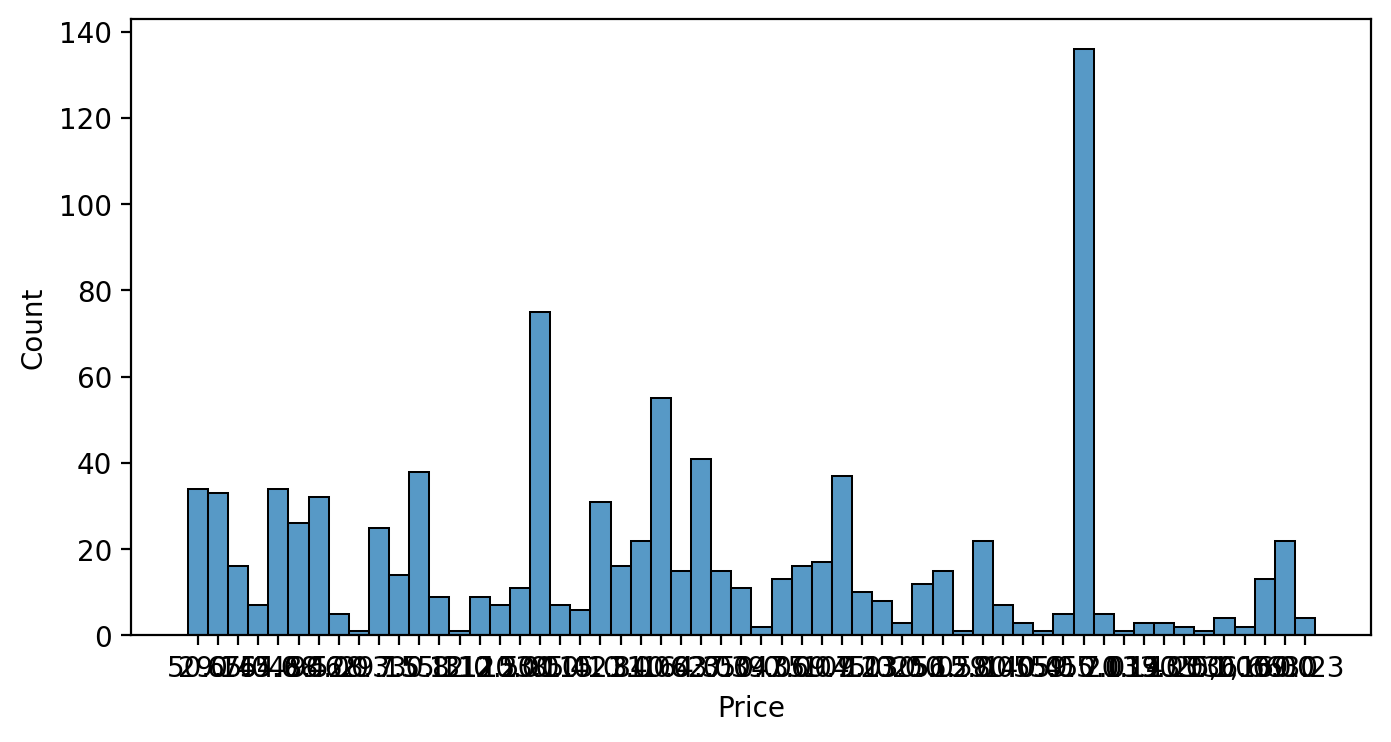

In [39]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,x=df_data.Price,bins=10)
plt.show()

In [40]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [44]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country  
0  StatusActive   50.0        Success     USA  
1  StatusActive  29.75        Success     CHN  
2  StatusActive    NaN        Success     USA  
3  StatusActive   65.0        Success     RUS  
4  StatusActive  145.0        Success     USA

In [62]:
df_data.loc[105]

Organisation                                       VKS RF
Location          Site 133/3, Plesetsk Cosmodrome, Russia
Date                               Aug 30, 2019 14:00 UTC
Detail                        Rokot/Briz KM | Cosmos 2540
Rocket_Status                               StatusRetired
Price                                                41.8
Mission_Status                                    Success
Country                                               RUS
Name: 105, dtype: object

# Use a Choropleth Map to Show the Number of Failures by Country


In [46]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True) 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [47]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [48]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_13116\4115032074.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Organisation     Price
0  Arianespace 16,345.00
1       Boeing  1,241.00
2         CASC  6,340.26
3          EER     20.00
4          ESA     37.00

# Analyse the Amount of Money Spent by Organisation per Launch

In [49]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

Organisation  Price
0  Arianespace 170.26
1       Boeing 177.29
2         CASC  40.13
3          EER  20.00
4          ESA  37.00

# Chart the Number of Launches per Year

In [66]:
# Converted the date to the datetime object, then extracted the year from the datetime object.
df_data['date'] = pd.to_datetime(df_data['Date'],format='mixed')
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)

ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year', 
    'count'
]
fig = px.bar(
    ds, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions number by year' 
)
fig.show()


C:\Users\Harsh\AppData\Local\Temp\ipykernel_13116\322817421.py:2: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



In [67]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                      Date                                        Detail  \
0   Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1   Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2   Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3   Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4   Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country                       date  year  
0  StatusActive   50.0        Success     USA  2020-08-07 05:12:00+00:00  2020  
1  StatusActive  29.75        Success     CHN  2020-08-06 04:01:00+00:00  2020  
2  StatusActive    NaN        Success     USA  2020-08-04 23:57:00+00:00  2020  
3  StatusActive   65.0        Success     RUS  2020-07-30 21:25:00+00:00  2020  
4  StatusActive  145.0        Success     USA  2020-07-30 11:50:00+00:00  2020

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [68]:
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month', 
    'count'
]
fig = px.bar(
    ds, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions number by month' 
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [69]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [70]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)

ds.sort_values(by="count", ascending=True)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

<Axes: xlabel='year'>

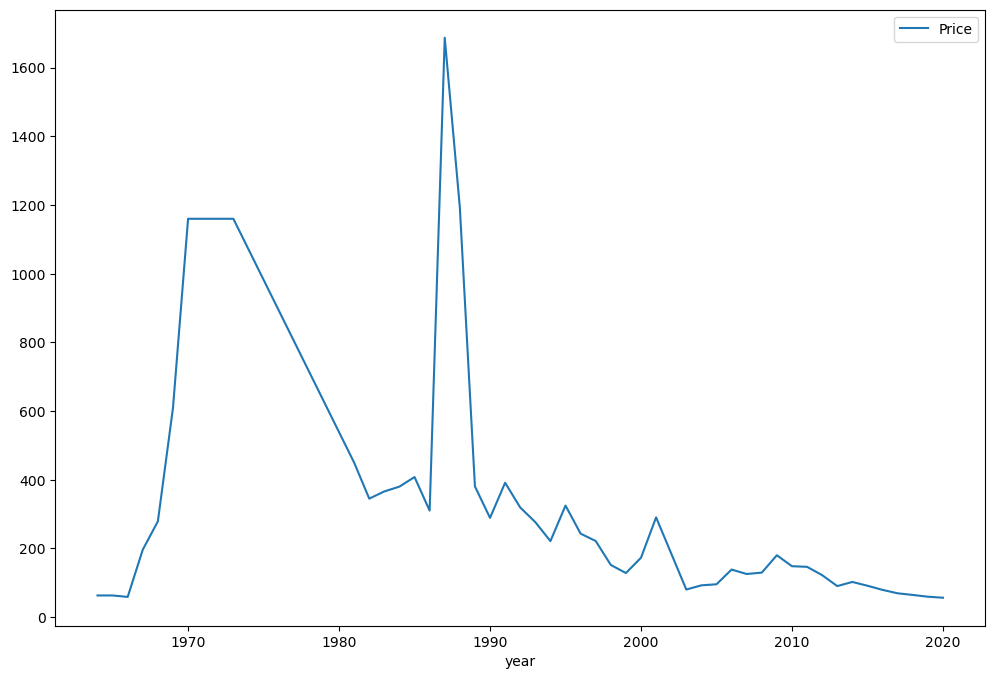

In [74]:
avg_price = df_data[df_data["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

avg_price.groupby("year").agg({'Price': pd.Series.mean}).plot(figsize=(12, 8))

In [73]:
avg_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    964 non-null    object 
 1   Location        964 non-null    object 
 2   Date            964 non-null    object 
 3   Detail          964 non-null    object 
 4   Rocket_Status   964 non-null    object 
 5   Price           964 non-null    float64
 6   Mission_Status  964 non-null    object 
 7   Country         964 non-null    object 
 8   date            964 non-null    object 
 9   year            964 non-null    int64  
 10  month           964 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 90.4+ KB


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [80]:
top_10 = pd.DataFrame(columns=df_data.columns)

# Group by Organisation, count occurrences, sort, and get top 10 organisations
top_10_orgs = df_data.groupby("Organisation").count().sort_values("Date", ascending=False)[:10].index

for val in top_10_orgs:
    org = df_data[df_data.Organisation == val]
    top_10 = pd.concat([top_10, org], ignore_index=True)

# Create histogram using Plotly Express
fig = px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation", nbins=10)

# Show the histogram
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [81]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]

In [82]:
cold_war_years = Or_df.sort_values("year")

# Grab years from start of dataset (1964) til 1991
cold_war_years[(cold_war_years.year <= 1991)]

Organisation                                    Location  \
4323         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4293      US Air Force     LC-11, Cape Canaveral AFS, Florida, USA   
...                ...                                         ...   
1755              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1754  General Dynamics     SLC-3W, Vandenberg AFB, California, USA   
1753         RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   
1762         RVSN USSR      Site 43/3, Plesetsk Cosmodrome, Russia   
1751         RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   

                         Date                                  Detail  \
4323   Oct 04, 1957 19:28 UTC              Sputnik 8K71PS | Sputnik-1   
4322   Nov 03, 1957 02:30 UTC              Sputnik 8K71PS | Sputnik-2   
4321   Dec 06, 1957 16:44 UTC                 Vanguard | Vanguard TV3   
4320   Feb 01, 1958 03:48 UTC                     Juno I | Explorer 1   
4293   Dec 18, 1958 23:02 UTC                    SM-65B Atlas | SCORE   
...                       ...                                     ...   
1755   Apr 28, 1991 11:33 UTC        Space Shuttle Discovery | STS-39   
1754   May 14, 1991 15:52 UTC         Atlas-E/F Star-37S-ISS | NOAA-D   
1753   May 16, 1991 21:40 UTC         Tsyklon-3 | Cosmos 2143 to 2148   
1762   Mar 22, 1991 12:19 UTC  Molniya-M /Block ML | Molniya-3 n†­148   
1751   Jun 04, 1991 09:00 UTC                     Tsyklon-3 | Okean 3   

      Rocket_Status  Price Mission_Status Country                       date  \
4323  StatusRetired    NaN        Success     RUS  1957-10-04 19:28:00+00:00   
4322  StatusRetired    NaN        Success     RUS  1957-11-03 02:30:00+00:00   
4321  StatusRetired    NaN        Failure     USA  1957-12-06 16:44:00+00:00   
4320  StatusRetired    NaN        Success     USA  1958-02-01 03:48:00+00:00   
4293  StatusRetired    NaN        Success     USA  1958-12-18 23:02:00+00:00   
...             ...    ...            ...     ...                        ...   
1755  StatusRetired  450.0        Success     USA  1991-04-28 11:33:00+00:00   
1754  StatusRetired    NaN        Success     USA  1991-05-14 15:52:00+00:00   
1753  StatusRetired    NaN        Success     RUS  1991-05-16 21:40:00+00:00   
1762  StatusRetired    NaN        Success     RUS  1991-03-22 12:19:00+00:00   
1751  StatusRetired    NaN        Success     RUS  1991-06-04 09:00:00+00:00   

      year  month  
4323  1957     10  
4322  1957     11  
4321  1957     12  
4320  1958      2  
4293  1958     12  
...    ...    ...  
1755  1991      4  
1754  1991      5  
1753  1991      5  
1762  1991      3  
1751  1991      6  

[2432 rows x 11 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [83]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
Or_df.head()

Organisation                                      Location  \
0       SpaceX    LC-39A, Kennedy Space Center, Florida, USA   
2       SpaceX                 Pad A, Boca Chica, Texas, USA   
3    Roscosmos  Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA      SLC-41, Cape Canaveral AFS, Florida, USA   
6    Roscosmos    Site 31/6, Baikonur Cosmodrome, Kazakhstan   

                      Date                                        Detail  \
0   Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
2   Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3   Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4   Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   
6   Jul 23, 2020 14:26 UTC                   Soyuz 2.1a | Progress MS-15   

  Rocket_Status  Price Mission_Status Country                       date  \
0  StatusActive   50.0        Success     USA  2020-08-07 05:12:00+00:00   
2  StatusActive    NaN        Success     USA  2020-08-04 23:57:00+00:00   
3  StatusActive   65.0        Success     RUS  2020-07-30 21:25:00+00:00   
4  StatusActive  145.0        Success     USA  2020-07-30 11:50:00+00:00   
6  StatusActive   48.5        Success     RUS  2020-07-23 14:26:00+00:00   

   year  month  
0  2020      8  
2  2020      8  
3  2020      7  
4  2020      7  
6  2020      7

In [84]:
launches = Or_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

Country  counts
0     RUS    2099
1     USA    1351

([<matplotlib.patches.Wedge at 0x17c4e109410>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

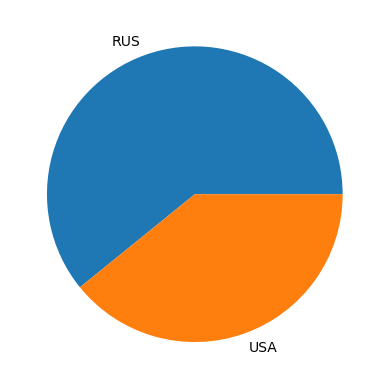

In [85]:
colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

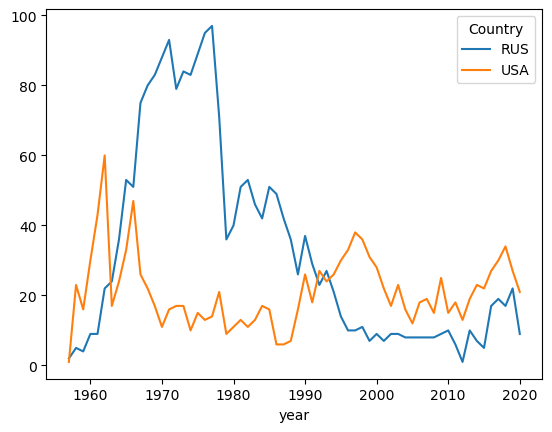

In [86]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# .size() can be used rather than counts()
Or_df.groupby(["year", "Country"]).size().unstack().plot()

In [88]:
Or_df['Mission_Status'].unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

## Chart the Total Number of Mission Failures Year on Year.

In [89]:
Or_df = Or_df[(Or_df.Mission_Status == 'Failure')|(Or_df.Mission_Status == 'Partial Failure')|(Or_df.Mission_Status == 'Prelaunch Failure')]

In [91]:
yearly_failures = px.data.tips()
fig = px.sunburst(Or_df, path=["year", "Mission_Status"])
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

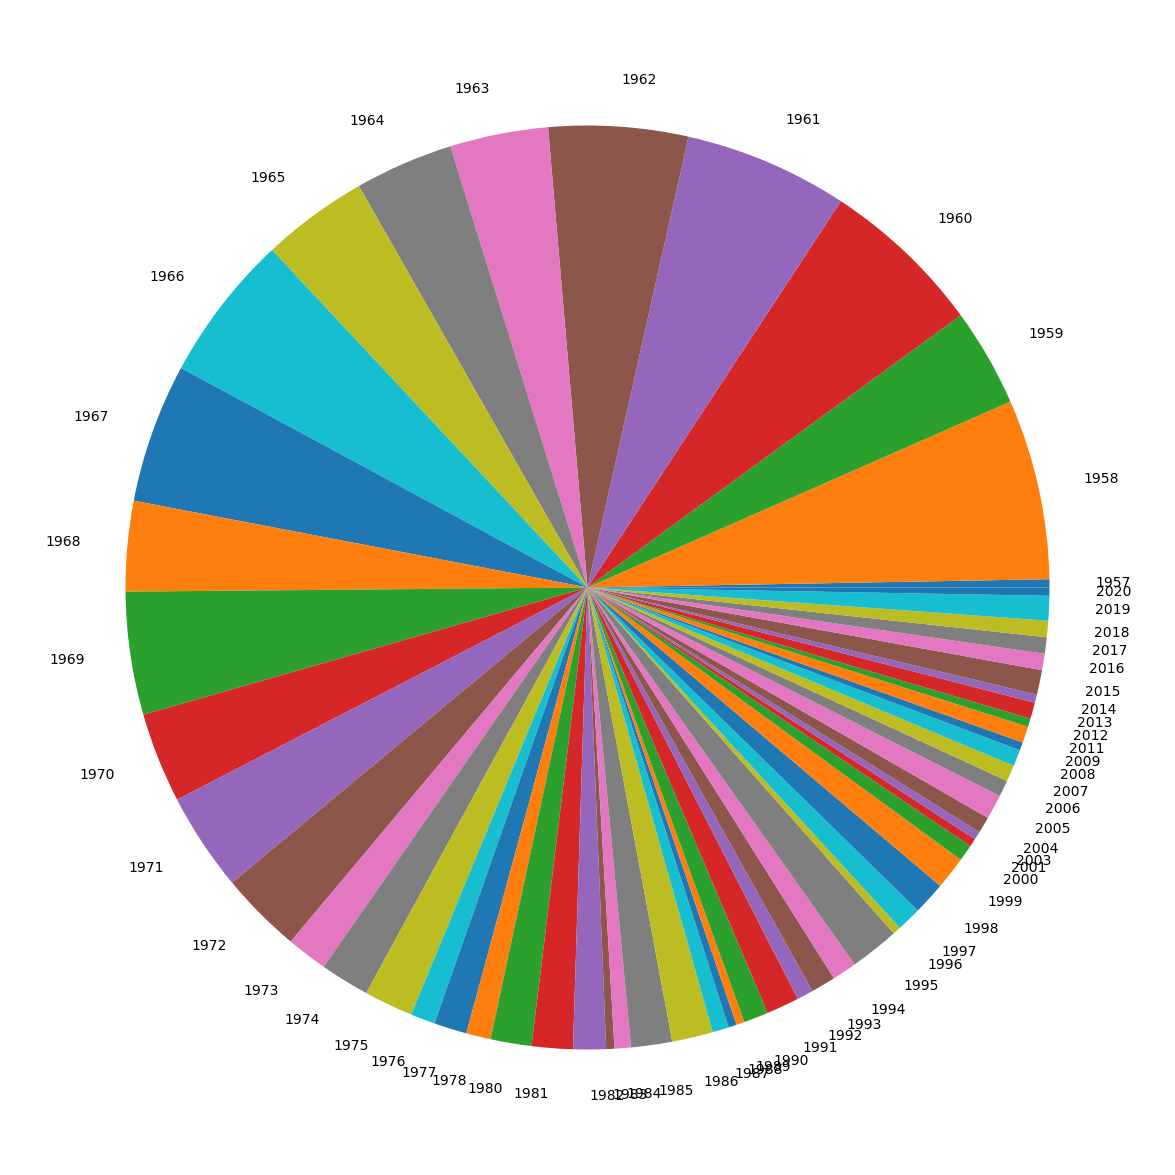

In [92]:
grouping = Or_df.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [93]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

# group by year, then by country, then find max count
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

year Country  counts
0  1957     RUS       2
1  1957     USA       1
2  1958     USA      23
3  1958     RUS       5
4  1959     USA      16

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [94]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

# group by year, then by country, then find max count
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

year Organisation  counts
0  1957    RVSN USSR       2
1  1957      US Navy       1
2  1958      US Navy      12
3  1958         AMBA       7
4  1958    RVSN USSR       5

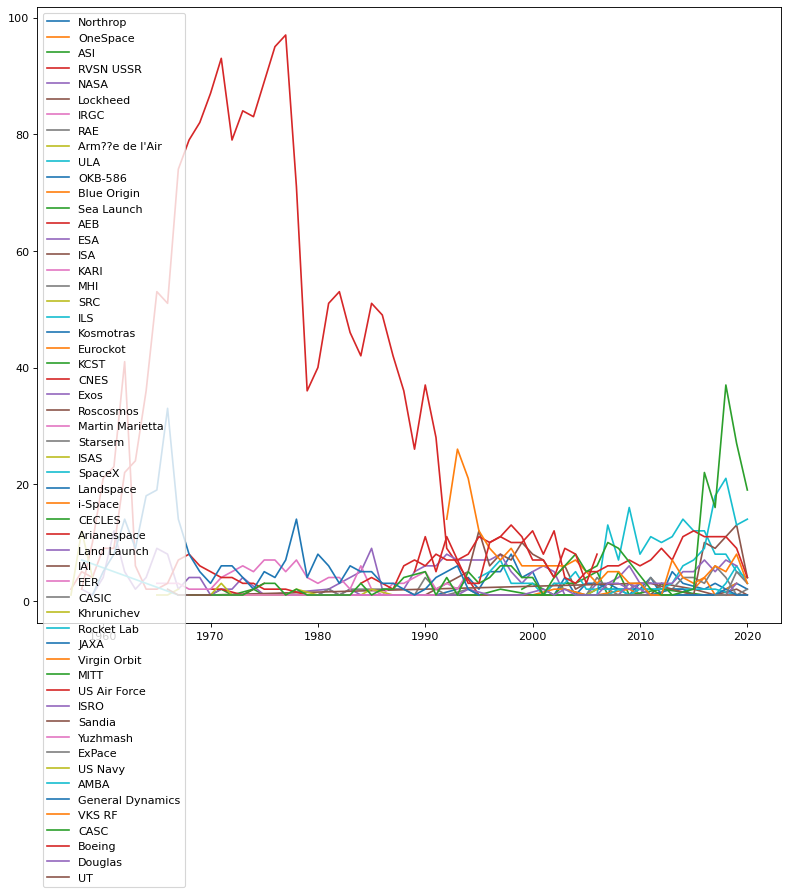

In [95]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)
   
plt.legend()
plt.show()